In [42]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## All features

In [43]:
df = pd.read_csv('./data/diabetes_data.csv')
df['gender'] = df['gender'].replace({'Male':0, 'Female':1})

In [44]:
X_train, X_test, y_train, y_test = utils.split_data(df)

In [68]:
df_all = utils.apply_classifiers(X_train, y_train, X_test, y_test)

Accuracy of k-NN on test set: 0.8654
Accuracy of SVC on test set: 0.6827
Accuracy of MLP on test set: 0.8750
Accuracy of Decision Tree Classifier on test set: 0.9615


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics kNN: {'accuracy': 0.8653846153846154, 'precision': 0.8890656617496114, 'recall': 0.8653846153846154, 'f1_score': 0.8691418230891915, 'roc_auc': 0.9594536918480581}


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics MLP: {'accuracy': 0.9038461538461539, 'precision': 0.9038461538461539, 'recall': 0.9038461538461539, 'f1_score': 0.9038461538461539, 'roc_auc': 0.9667093469910372}
Metrics SVM: {'accuracy': 0.8942307692307693, 'precision': 0.8952407886231415, 'recall': 0.8942307692307693, 'f1_score': 0.8946450236542328, 'roc_auc': 0.9611609048228766}
Metrics Decision Tree: {'accuracy': 0.9230769230769231, 'precision': 0.9225330568680105, 'recall': 0.9230769230769231, 'f1_score': 0.922409188034188, 'roc_auc': 0.9436619718309858}


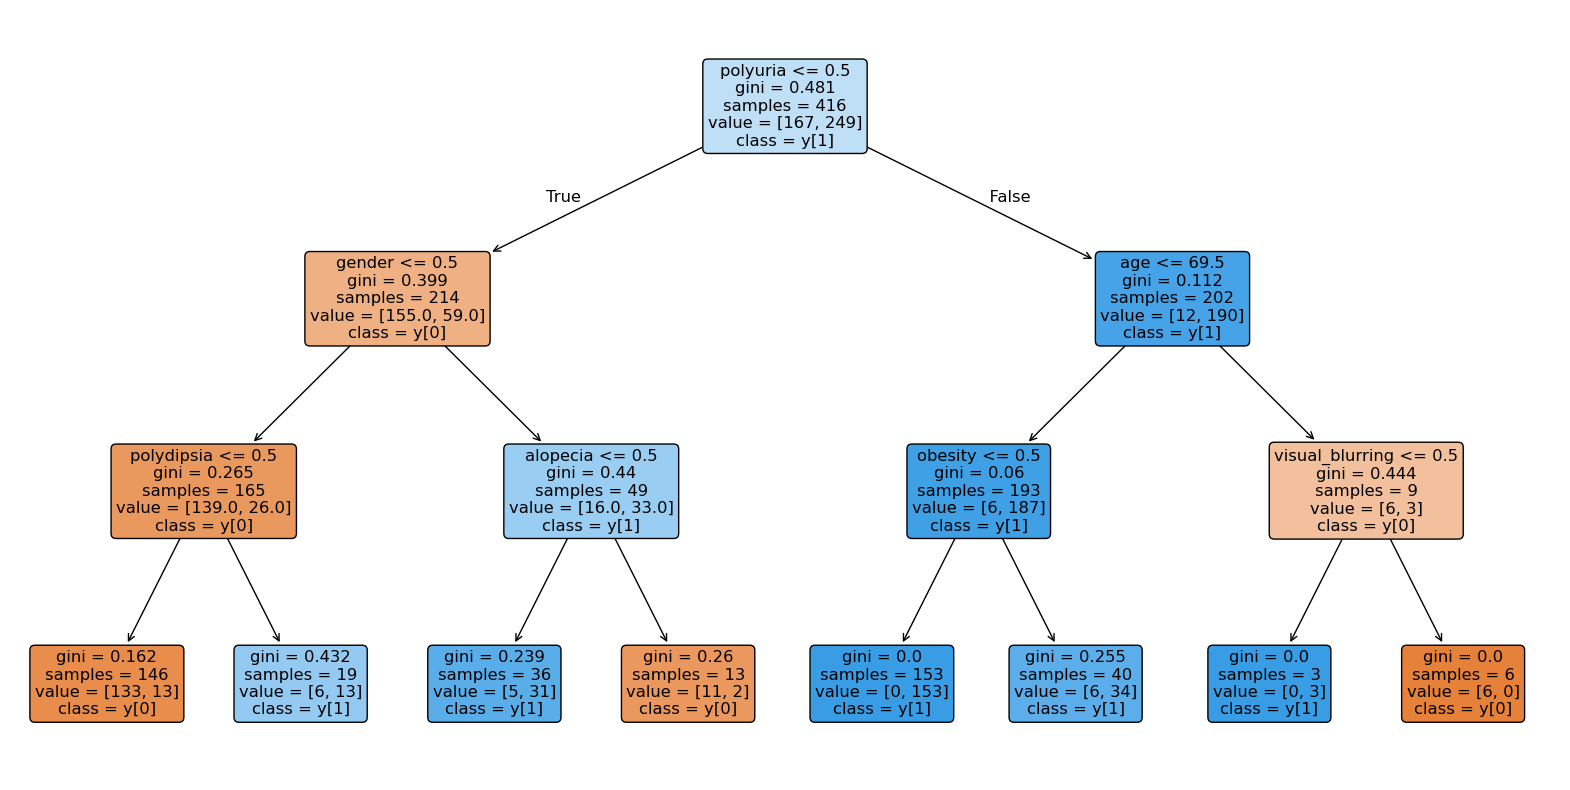

In [47]:
knn_model, knn_metrics = utils.train_and_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors=5)
print("Metrics kNN:", knn_metrics)

nn_model, nn_metrics = utils.train_and_evaluate_neural_network(X_train, y_train, X_test, y_test, hidden_layer_sizes=(100,), max_iter=200)
print("Metrics MLP:", nn_metrics)

svm_model, svm_metrics = utils.train_and_evaluate_svm(X_train, y_train, X_test, y_test, C=1.0, kernel='linear')
print("Metrics SVM:", svm_metrics)

tree_model, tree_metrics = utils.train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth=3)
print("Metrics Decision Tree:", tree_metrics)
utils.plot_decision_tree(tree_model, feature_names=df.columns[:-1])

In [103]:
results_allfeat = utils.apply_classifiers(X_train, y_train, X_test, y_test, plot_roc=False)
results_allfeat

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy,precision,recall,f1_score,roc_auc,Model
0,0.865,0.889,0.865,0.869,0.959,KNeighborsClassifier
1,0.894,0.895,0.894,0.895,0.961,SVC
2,0.904,0.904,0.904,0.904,0.967,MLPClassifier
3,0.962,0.966,0.962,0.962,0.972,DecisionTreeClassifier


In [104]:
utils.df_to_tex(results_allfeat)

\begin{tabular}{llrrrrr}
\toprule
 & Model & accuracy & precision & recall & f1_score & roc_auc \\
\midrule
0 & KNeighborsClassifier & 0.86 & 0.89 & 0.86 & 0.87 & 0.96 \\
1 & SVC & 0.89 & 0.90 & 0.89 & 0.90 & 0.96 \\
2 & MLPClassifier & 0.90 & 0.90 & 0.90 & 0.90 & 0.97 \\
3 & DecisionTreeClassifier & 0.96 & 0.97 & 0.96 & 0.96 & 0.97 \\
\bottomrule
\end{tabular}



## Univariate filtered subset selection

In [96]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

df_univ = pd.DataFrame()
for k in range(1,17): 
    print(f'Using {k} best features...........')
    X = df.drop(columns=['class'])
    y = df['class']
    X_new = SelectKBest(f_classif, k=k).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    df_univ_k = utils.apply_classifiers(X_train, y_train, X_test, y_test)
    df_univ_k['#K_Best'] = k
    df_univ = pd.concat([df_univ, df_univ_k], axis=0)
    print()

Using 1 best features...........

Using 2 best features...........

Using 3 best features...........

Using 4 best features...........

Using 5 best features...........

Using 6 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 7 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 8 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 9 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 10 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 11 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 12 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 13 best features...........

Using 14 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 15 best features...........


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 16 best features...........



/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
df_filter_univ

,accuracy,precision,recall,f1_score,roc_auc,Model,#K_Best
0,0.798,0.844,0.798,0.805,0.828,KNeighborsClassifier,1
1,0.798,0.844,0.798,0.805,0.828,SVC,1
2,0.798,0.844,0.798,0.805,0.828,MLPClassifier,1
3,0.798,0.844,0.798,0.805,0.828,DecisionTreeClassifier,1
0,0.865,0.872,0.865,0.867,0.905,KNeighborsClassifier,2
...,...,...,...,...,...,...,...
3,0.942,0.951,0.942,0.943,0.958,DecisionTreeClassifier,15
0,0.865,0.889,0.865,0.869,0.959,KNeighborsClassifier,16
1,0.894,0.895,0.894,0.895,0.961,SVC,16
2,0.904,0.904,0.904,0.904,0.967,MLPClassifier,16


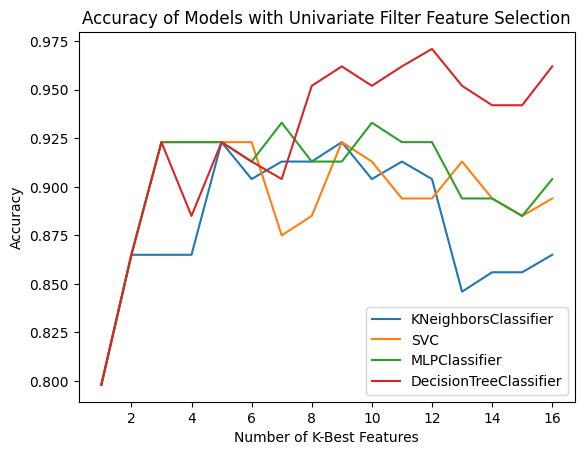

In [102]:
for model in df_univ['Model'].unique():
    df_model = df_univ[df_univ['Model'] == model]
    plt.plot(df_model['#K_Best'], df_model['accuracy'], label=model, )

plt.legend()    
plt.title('Accuracy of Models with Univariate Filter Feature Selection')
plt.xlabel('Number of K-Best Features')
plt.ylabel("Accuracy")
plt.savefig('./img/all-features-kbest.png')
plt.show()

## Multivariate filtered subset selection